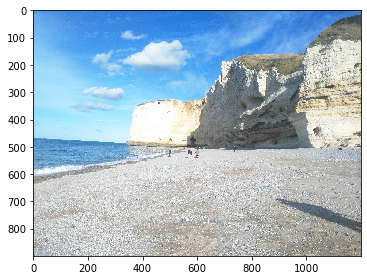

In [1]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

im = imread('etretat.jpg')
imshow(im)

ESSAI Filters Gaussian 

Text(0.5, 1.0, 'premierenoise3.jpg')

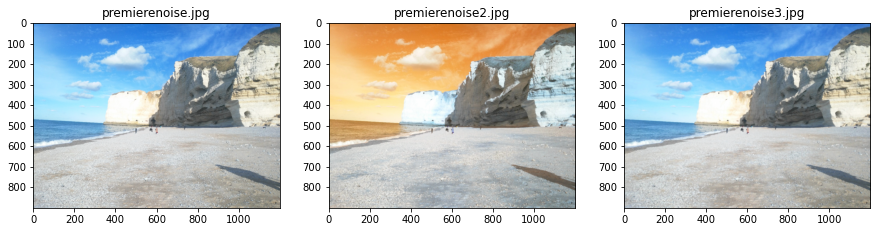

In [2]:
from skimage.filters.rank import mean, median
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt
import cv2
from cv2 import medianBlur

im = imread('etretat.jpg')

nois1 = cv2.medianBlur(im, 3)
cv2.imshow('Median filter - Gaussian noise',nois1)
#cv2.waitKey()
cv2.imwrite("Median filter - Gaussian noise.jpg",nois1)


#nois = imread("Median filter - Gaussian noise.jpg")


nois2 = cv2.medianBlur(imread ("Median filter - Gaussian noise.jpg"), 3)
cv2.imshow('Median filter - Uniform noise',nois2)
#cv2.waitKey()
cv2.imwrite("Median filter - Uniform noise.jpg",nois2)

#nois = imread("Median filter - Uniform noise.jpg")


nois3 = cv2.medianBlur(imread ("Median filter - Uniform noise.jpg"), 3)
cv2.imshow('Median filter - Impuls noise',nois3)
#cv2.waitKey()
cv2.imwrite("Median filter - Impuls noise.jpg",nois3)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(cv2.imread("Median filter - Gaussian noise.jpg"))
plt.title('premierenoise.jpg')
plt.subplot(132)
plt.imshow(cv2.imread("Median filter - Uniform noise.jpg"))
plt.title('premierenoise2.jpg')
plt.subplot(133)
plt.imshow(cv2.imread("Median filter - Impuls noise.jpg"))
plt.title('premierenoise3.jpg')

ESSAI Constrats 

Text(0.5, 1.0, 'etretatcontrast')

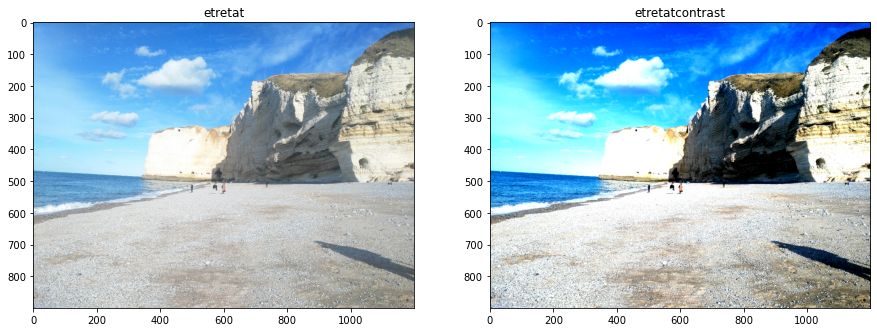

In [3]:
from PIL import Image, ImageFilter
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt

#Lire l'image
im = Image.open('etretat.jpg')


#Affiche l'image
#im.show()

from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
enh.enhance(2) 
# possibilité de modifier l intensité du contraste 
enh.enhance(2).save("20% more constrast.png","PNG")

imcontrast = Image.open("20% more constrast.png")


plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow (im)
plt.title('etretat')
plt.subplot(122)
plt.imshow (imcontrast)
plt.title('etretatcontrast')

GAMMA @ parametres

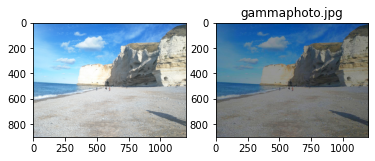

In [4]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from skimage.io import imread,imsave,imshow

def adjust_gamma(image, gamma=1):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 150
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

# break
#-------------------PARAMETRES------------------------
gamma = 1
saturation = 1.5
contrast = 1
luminosite = 1
nettete = 1
#-----------------------------------------------------

# plt.figure(figsize=(20,20))

# plt.subplot(133)
# imshow(imread("ex_enhance.jpg"))
# plt.title("RESULTAT")

# plt.subplot(132)
imsave("gamma.jpg", adjust_gamma(imread("etretat.jpg"), gamma))
# imsave("gamma.jpg", imread("etretat.jpg"))
img = Image.open('gamma.jpg')
# img = img.filter(ImageFilter.DETAIL)

converter = ImageEnhance.Color(img)
img = converter.enhance(saturation)
converter = ImageEnhance.Brightness(img)
img = converter.enhance(luminosite)
converter = ImageEnhance.Sharpness(img)
img = converter.enhance(nettete)
converter = ImageEnhance.Contrast(img)
img = converter.enhance(contrast) 
img.save("gamma.jpg")

img.show()
plt.subplot(122)
plt.imshow(imread('gamma.jpg'))
plt.title('gammaphoto.jpg')

plt.subplot(121)
plt.imshow(imread("etretat.jpg"))

AMELIORATION DE L IMAGE 

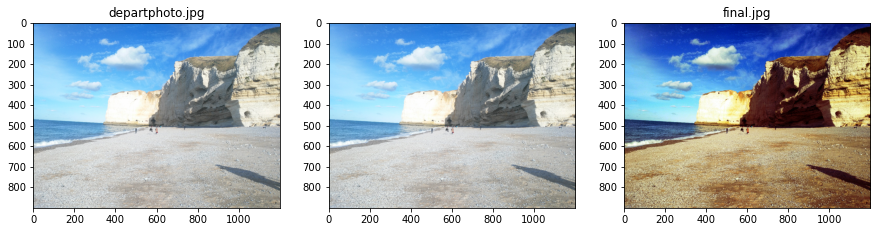

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as pyplot
import argparse
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from skimage.io import imread,imsave,imshow

def adjust_gamma(image, gamma=1):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

#-------------------PARAMETRES------------------------
gamma = 1.5
saturation = 0.3
contrast = 1
luminosite = 1
nettete = 1
#-----------------------------------------------------

plt.figure(figsize=(15,15))

im1= imread ('etretat.jpg')
plt.subplot(131)
plt.imshow(im1)
plt.title('departphoto.jpg')
img = plt.imread('etretat.jpg', 1)
plt.subplot(132)
plt.imshow(img)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256, np.float) # Because it is a probability, it may be a floating point number
count_g = np.zeros(256, np.float)
count_r = np.zeros(256, np.float)


# Comptage nbr pixels 
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]

        index_b = int(b)
        index_g = int(g)
        index_r = int(r)

        count_b[index_b] = count_b[index_b] + 1
        count_g[index_g] = count_g[index_g] + 1
        count_r[index_r] = count_r[index_r] + 1

total = height * width # Total pixels
count_b =  count_b / total  
count_g =  count_g / total
count_r =  count_r / total

# Calcul prob cumul
sum_b = sum_g = sum_r = float(0)
for i in range(256):
    sum_b += count_b[i]
    count_b[i] = sum_b 

    sum_g += count_g[i]
    count_g[i] = sum_g

    sum_r += count_r[i]
    count_r[i] = sum_r

# the mapping table
mapl_b = np.uint16(255 * count_b)
mapl_g = np.uint16(255 * count_g)
mapl_r = np.uint16(255 * count_r)

# Map the image
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]
        b = mapl_b[b]
        g = mapl_g[g]
        r = mapl_r[r]

        dst[i, j] = (b, g, r)


plt.subplot(133)
plt.imshow(dst)
plt.imsave("final.jpg", dst)
plt.title('final.jpg')

img = Image.open('final.jpg')
img = img.filter(ImageFilter.DETAIL)

converter = ImageEnhance.Color(img)
img = converter.enhance(saturation)
converter = ImageEnhance.Brightness(img)
img = converter.enhance(luminosite)
converter = ImageEnhance.Sharpness(img)
img = converter.enhance(nettete)
converter = ImageEnhance.Contrast(img)
img = converter.enhance(contrast) 

img.save("final.jpg")


EXTRA effet couleur 

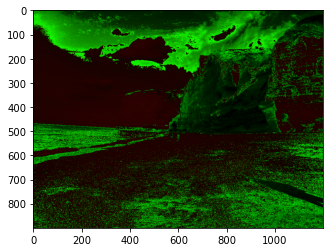

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


original = cv2.imread('final.jpg')



for k in range(0,50):
    original[:,:,0] = original[:,:,0] / 1.03
    original[:,:,1] = original[:,:,1] * 1.02
    original[:,:,2] = original[:,:,2] * 0
      
    
    cv2.imshow('Updated',original)
    cv2.waitKey(40)
cv2.destroyAllWindows()
plt.imshow(original)
plt.show()

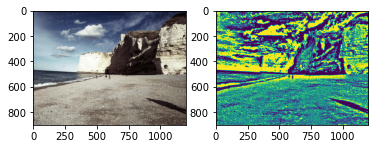

In [3]:
import cv2
import numpy as np
from skimage.io import imread 
from matplotlib import pyplot as plt
img = imread('final.jpg')
plt.subplot(121)
plt.imshow(img)

grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscaled, 256, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
plt.subplot(122)
plt.imshow(th)